If Jupyter notebooks are new to you, there is a tutorial provided to help you out: [01-Jupyter Notebooks.ipynb](https://github.com/COGS108/Tutorials/blob/master/01-JupyterNotebooks.ipynb). Use this reference to help you out!

# Data Wrangling


- working with data files in Python
    - semi-strcutred files
    - Web Scraping & APIs
- wrangling data with `pandas`

In [1]:
# Import standard libraries
%matplotlib inline
import pandas as pd
import numpy as np

This notebook is an edited version of a noteook initially authored by [Tom Donoghue](https://tomdonoghue.github.io/). Thanks to Tom for such a great `pandas` primer!

## Data 'Friendliness'

The degree to which a data filetype easily lends itself to useful analysis.

## 'Friendly' File Types:

- csv
- tsv
- json
- txt
- xml

## 'Unfriendly' File Types:
- pdf
- docx
- html
- Anything made to look nice for humans

### CSV Files

- 'Comma Separated Value' files store data, separated by comma's. 
- Think of them like lists.

In [2]:
# Note: through this notebook, I will be using '!' to run the shell command 'cat'
#  to print out the content of example data files

!cat files/dat.csv

1, 2, 3, 4
5, 6, 7, 8
9, 10, 11, 12

In [3]:
# Python has a module devoted to working with csv's
import csv

In [4]:
# We can read through our file with the csv module
with open('files/dat.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    for row in csv_reader:
        print(', '.join(row))

1,  2,  3,  4
5,  6,  7,  8
9,  10,  11,  12


In [5]:
# Pandas also has functions to directly load csv data
pd.read_csv?

In [6]:
# Let's read in our csv file
pd.read_csv('files/dat.csv', header=None) 

0   1   2   3
0  1   2   3   4
1  5   6   7   8
2  9  10  11  12

## iclicker Question

What does `pd` in `pd.read_csv()` specify?

- A) it's the name of the function
- B) that the `read_csv` method is from the pd package
- C) that the `read_csv` method is from the pandas package (we're using the shortcut `pd`)
- D) to read a csv file into python
- E) I'm super lost

### JSON

- JavaScript Object Notation files can store hierachical key/value pairings. 
- Think of them like dictionaries.

In [7]:
!cat files/dat.json

{
  "firstName": "John",
  "age": 53
}


In [8]:
# Think of json's as similar to dictionaries
d = {'firstName': 'John', 'age': '53'}
print(type(d),'\n',d)

<class 'dict'> 
 {'firstName': 'John', 'age': '53'}


In [9]:
# Python also has a module for dealing with json
import json

In [10]:
# Load a json file
with open('files/dat.json') as dat_file:    
    dat = json.load(dat_file)

In [11]:
# Check what data type this gets loaded as
print(type(dat))

<class 'dict'>


In [12]:
# Pandas also has support for reading in json files
pd.read_json?

In [12]:
# You can read in json formatted strings with pandas
pd.read_json('{ "first": "Alan", "place": "Manchester"}', typ='series')

first          Alan
place    Manchester
dtype: object

In [13]:
# Read in our json file with pandas
pd.read_json('files/dat.json', typ='series')

firstName    John
age            53
dtype: object

### XML

- eXtensible Markup Language files store 'tagged' data. 
- Think of them like HTML.

In [15]:
!cat files/dat.xml

<person>
	<who>Claude</who>
	<what>Info</who>
	<when>50s</when>
</person>

In [14]:
# We can read in the XML file with standard python I/O
with open('files/dat.xml') as dat_file:
    dat = dat_file.read()

In [15]:
# Check out the data
dat

'<person>\n\t<who>Claude</who>\n\t<what>Info</who>\n\t<when>50s</when>\n</person>'

In [16]:
# Beautiful Soup has functions to 'clean up' XML into human-friendlier formats
from bs4 import BeautifulSoup
nice_dat = BeautifulSoup(dat, 'xml')

In [17]:
# Check out the parsed data
print(nice_dat)

<?xml version="1.0" encoding="utf-8"?>
<person>
<who>Claude</who>
<what>Info</what>
<when>50s</when>
</person>


<center>
<img src="img/pandas.png" alt="pandas" width="600px">
</center>

Pandas is Python library for managing heterogenous data.

At it's core, Pandas is used for the DataFrame object, which is:
- a data structure for labelled rows and columns of data
- associated methods and utilities for working with data.

## Loading Data

In [57]:
# Load a csv file of data
df = pd.read_csv('my_data.csv')

In [42]:
# Check out a few rows of the dataframe
df.head(n=10)

id first_name last_name  age  score      value
0   295     Andrea     Clark   46     -1   24547.87
1   620       Bill     Woods   46    492   46713.90
2   891  Alexander  Jacobson   48    489   32071.74
3   914    Derrick   Bradley   52     -1   30650.48
4  1736    Allison    Thomas   44     -1    9553.12
5  2049    Stephen  Williams   57    333  138936.92
6  2241      Malik      Wood   46     -1   10804.47
7  2607      Amber    Garcia   50    536    9367.27
8  2635      David   Coleman   68    351   66035.28
9  3585       Eric    Atkins   56    582  103977.32

## Pandas Indexing

In [40]:
# Indexing: select a column using it's name
df['last_name']

id
295          Clark
620          Woods
891       Jacobson
914        Bradley
1736        Thomas
2049      Williams
2241          Wood
2607        Garcia
2635       Coleman
3585        Atkins
4199       Johnson
6739        Barnes
7099        Prince
7264       Mcmahon
7799         Jones
8343         Weber
9386         Clark
10753         Wood
12243      Sanchez
12250        Adams
12841     Williams
12913      Blevins
13120          Key
13255       Palmer
13806        Jones
14033       Ibarra
14294      Walters
15137      Simpson
15391     Santiago
15887         Mann
           ...    
87876        Dixon
87928       Miller
88273     Matthews
88340       Brooks
88868    Wilkinson
89550        Sharp
89765     Thompson
89922        Woods
90113       Morgan
90367      Stewart
91524      Gardner
91623         Webb
91893       Martin
91921       Brooks
91946       Garcia
92298        Marks
93114       Fields
93989       Adkins
94421        Reyes
94628      Andrews
94730    Dominguez
95502    

In [14]:
# Indexing: select a row & column with 'loc'
df.loc[10, 'score']

500

In [15]:
# Boolean comparisons & indexing
df[df['score'] > 500]

id  first_name  last_name  age  score      value
7     2607       Amber     Garcia   50    536    9367.27
9     3585        Eric     Atkins   56    582  103977.32
12    7099       Larry     Prince   52    519   28474.33
18   12243      Monica    Sanchez   49    524   35256.88
23   13255      Kelsey     Palmer   32    519   18858.85
25   14033       Larry     Ibarra   34    632    4315.74
29   15887   Cassandra       Mann   27    684   17864.92
31   17184        Anne     Zuniga   56    549   81928.82
34   18610     Jeffrey    Harrell   52    790   59912.55
37   20708       Dylan      Blake   33    750    6984.92
38   21427    Benjamin       Tran   34    543    9099.38
43   24794     Jasmine   Mitchell   53    552   86540.27
46   25654      Ronald    Perkins   37    533   20991.69
47   25735        Anna        Ray   39    578   19122.05
48   26091       Marie      Wyatt   44    620        NaN
51   27225      Dennis      Mason   62    622  105449.11
58   32151     Charles        Lam   47    942   35391.52
59   32413       Sarah     Harris   53    609   16980.92
62   34069     Cynthia       West   29    558    1952.00
64   35621     Vanessa  Hernandez   35    613   28944.29
66   35870     Sabrina     Mcneil   41    649   32979.40
68   36575   Elizabeth     Bailey   53    642   16579.52
69   37045        Mary       Choi   42    682   39519.13
71   37970        Lisa      Myers   50    688   11203.32
74   40154       Marie    Daniels   41    512   14380.37
75   41347     Anthony     Tucker   52    508   21005.42
76   42138        John     Stuart   28    543        NaN
78   42472  Jacqueline      Young   35    618   42726.56
79   42747   Johnathan      Brown   46    567   15226.86
80   43140       Nancy     Farley   52    545   30315.75
..     ...         ...        ...  ...    ...        ...
139  75015       Kelly     Murray   43    542       0.00
140  75593      Regina     Morgan   47    614   95351.02
141  76282      Ashley      Lynch   53    519   14612.16
145  79114      Steven       Kent   32    574   10087.18
147  80411        Tina         Yu   56    525   29622.86
148  80593      Donald     Melton   42    625   20393.78
149  80765       David    Andrews   53    545       0.00
150  81068       Aaron    Roberts   32    617    4745.92
151  81282       Emily     Medina   23    775    9116.03
152  81648      Debbie    Barrett   49    766   18573.58
154  82826     Allison        Day   34    523   23130.71
155  83528      Brenda      Green   28    794    5233.10
159  84683     Jessica     Bryant   42    840  204999.96
160  84812      Amanda   Williams   14    749    5241.51
162  84846        Eric      Smith   39    714   15188.88
164  85812        Mark      Payne   51    563   32609.97
165  86230        Jose      Adams   41    551    7416.68
166  86560        John    Blevins   50    534   29842.60
171  87928   Alexandra     Miller   36    752   12297.85
173  88340      Autumn     Brooks   52    587   36261.02
176  89765     Charles   Thompson   46    678    8285.88
179  90367       Kevin    Stewart   48    700       0.00
183  91921      Javier     Brooks   38    658   15437.74
184  91946       Susan     Garcia   34    664    7084.82
192  96101       Wayne    Bentley   28    918   18303.20
194  96371      Sherri     Austin   46    698   29412.01
196  97728        Anna   Chambers   37    598       0.00
197  98115    Jennifer      Pitts   29    606    6876.75
198  98284    Brittany    Jenkins   34    665   43525.88
199  98366     Katelyn      Brown   45    501   29668.38

[82 rows x 6 columns]

## iclicker Question

What would be the output of `df['age'] > 10`?

- A) subset of `df` including only rows of individuals older than 10
- B) a Boolean with `True` for rows where age is greater than 10 and `False` otherwise
- C) `id`s of rows where observations are greater than 10 
- D) an error
- E) I'm super lost

In [65]:
## YOUR CODE HERE

## Checking out the DataFrame

In [39]:
# Check how large our dataframe is
df.shape

(200, 5)

In [43]:
# Check what columns we have in our DataFrame
df.columns

Index(['id', 'first_name', 'last_name', 'age', 'score', 'value'], dtype='object')

In [34]:
# Check the datatypes of our variables
df.dtypes

id              int64
first_name     object
last_name      object
age             int64
score           int64
value         float64
dtype: object

In [58]:
# Set the index to a string (non-numerical) and use it as index (row labels)
df['id'] = df['id'].astype('str')
df.set_index(df['id'], inplace=True)
df.head()

id first_name last_name  age  score     value
id                                                   
295    295     Andrea     Clark   46     -1  24547.87
620    620       Bill     Woods   46    492  46713.90
891    891  Alexander  Jacobson   48    489  32071.74
914    914    Derrick   Bradley   52     -1  30650.48
1736  1736    Allison    Thomas   44     -1   9553.12

## Exploring the data

In [49]:
# Get descriptive statistics of all numerical columns
df.describe()

age       score          value
count  200.000000  200.000000     189.000000
mean    46.020000  416.595000   28730.336296
std     10.028582  237.176674   32493.945741
min     14.000000   -1.000000       0.000000
25%     39.000000  288.750000    9593.030000
50%     46.000000  463.500000   17976.510000
75%     53.000000  596.500000   33163.310000
max     69.000000  942.000000  204999.960000

In [50]:
# Describe a particular column
df['score'].describe()

count    200.000000
mean     416.595000
std      237.176674
min       -1.000000
25%      288.750000
50%      463.500000
75%      596.500000
max      942.000000
Name: score, dtype: float64

In [51]:
# Check a particular descriptive statistic
df['value'].mean()

28730.336296296293

## iclicker Question

What's the average (mean) age of the individuals in this dataset?

- A) 14
- B) 46
- C) 28730
- D) NA
- E) I'm super lost

In [62]:
## YOUR CODE HERE

In [52]:
# Checking categorical data
df['first_name'].value_counts()[0:10]

David       6
Michael     5
James       4
Eric        4
Charles     4
Ashley      3
Brian       3
Sarah       3
Jennifer    3
Jason       3
Name: first_name, dtype: int64

## Selecting & Dropping Columns

In [59]:
# Drop columns we don't want
df.drop(labels=['first_name', 'last_name'], axis=1, inplace=True)

In [60]:
# Check out the DataFrame after dropping some columns
df.head()

id  age  score     value
id                              
295    295   46     -1  24547.87
620    620   46    492  46713.90
891    891   48    489  32071.74
914    914   52     -1  30650.48
1736  1736   44     -1   9553.12

## Sub-Selecting Data

In [56]:
# Check if we have any data from people below the age of 18
sum(df['age'] < 18)

1

In [45]:
# Select only participants who are 18 or older
df = df[df['age'] >= 18]

## Finding Missing Data - NaNs

In [46]:
# Check for missing values
df['value'].hasnans

True

In [47]:
# Check for null values
sum(df['value'].isnull())

11

In [48]:
# Have a look at the missing values
df[df['value'].isnull()]

age  score  value
id                      
10753   58    335    NaN
16263   42    323    NaN
24952   51    399    NaN
26091   44    620    NaN
29566   69    224    NaN
35466   55    483    NaN
42138   28    543    NaN
51723   40    443    NaN
55821   41    709    NaN
61534   39    598    NaN
94730   22     -1    NaN

## Dealing with Missing Data - NaNs

In [ ]:
# Dealing with null values: Replace values with a specified value
df.fillna(inplace=True)

In [49]:
# Dealing with null values: Drop rows with missing data
df = df.dropna()

## Finding Missing Data - Bad Values

In [50]:
# Check for the properties of specific columns
df['score'].describe()

count    188.000000
mean     414.329787
std      238.923293
min       -1.000000
25%      287.000000
50%      463.500000
75%      589.250000
max      942.000000
Name: score, dtype: float64

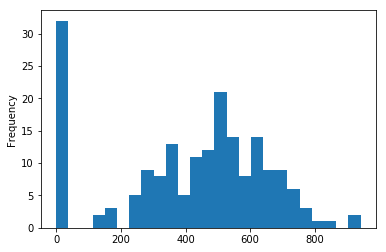

In [51]:
# Check the plot of the data for score to see the distribution
df['score'].plot('hist', bins=25)

## Dealing with Missing Data - Bad Values

In [52]:
# Look for how many values have a -1 value in 'score'
sum(df['score'] == -1)

32

In [53]:
# Drop any columns with -1 value in 'score'
df = df[df['score'] != -1]

## Visualizing Data

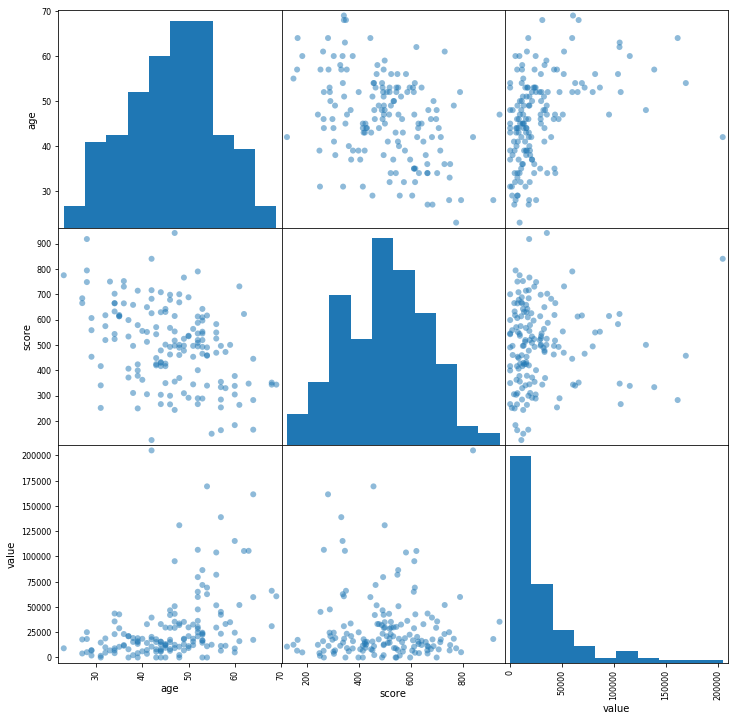

In [54]:
# Plot all numerical columns, and their interactions
pd.plotting.scatter_matrix(df[['age', 'score', 'value']], figsize=[12, 12], marker=12);

## Check for correlations between variables

In [55]:
# Take the correlations between all numerical columns
df.corr()

age     score     value
age    1.000000 -0.400901  0.400799
score -0.400901  1.000000  0.027144
value  0.400799  0.027144  1.000000

## Application Program Interface (APIs)

- APIs are basically a way for software to talk to software 
    - They are an interface into an application / website / database designed for computers / software.

Notes on APIs:
- Follow API guidelines! 
- These guidelines typically specify the number / rate / size of requests

<center>
<img src="img/github.png" alt="sql" height="200" width="200">
</center>

## Github API

You can access the github api with the following API. Just added specifiers for what you are looking for. 

https://api.github.com/

For example, the following URL will search for the user 'ShanEllis'

https://api.github.com/users/shanellis

## Requesting Web Pages from Python

In [30]:
# The requests module allows you to send URL requests from python
import requests  
from bs4 import BeautifulSoup

In [31]:
# Request data from the Github API on a particular user
page = requests.get('https://api.github.com/users/shanellis')

In [32]:
# The content we get back is a messily organized json file
page.content

b'{"login":"ShanEllis","id":6606571,"node_id":"MDQ6VXNlcjY2MDY1NzE=","avatar_url":"https://avatars3.githubusercontent.com/u/6606571?v=4","gravatar_id":"","url":"https://api.github.com/users/ShanEllis","html_url":"https://github.com/ShanEllis","followers_url":"https://api.github.com/users/ShanEllis/followers","following_url":"https://api.github.com/users/ShanEllis/following{/other_user}","gists_url":"https://api.github.com/users/ShanEllis/gists{/gist_id}","starred_url":"https://api.github.com/users/ShanEllis/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/ShanEllis/subscriptions","organizations_url":"https://api.github.com/users/ShanEllis/orgs","repos_url":"https://api.github.com/users/ShanEllis/repos","events_url":"https://api.github.com/users/ShanEllis/events{/privacy}","received_events_url":"https://api.github.com/users/ShanEllis/received_events","type":"User","site_admin":false,"name":"Shannon Ellis","company":null,"blog":"shanellis.com","location":"Baltimo

## iclicker Question

What type of output is this?

- A) CSV
- B) CML
- C) JSON
- D) API
- E) I'm super lost

In [7]:
# We can read in the json data with pandas
git_data = pd.read_json(page.content, typ='series')

In [8]:
# Check out the pandas series object full of data
git_data  

login                                                          ShanEllis
id                                                               6606571
node_id                                             MDQ6VXNlcjY2MDY1NzE=
avatar_url             https://avatars3.githubusercontent.com/u/66065...
gravatar_id                                                             
url                               https://api.github.com/users/ShanEllis
html_url                                    https://github.com/ShanEllis
followers_url           https://api.github.com/users/ShanEllis/followers
following_url          https://api.github.com/users/ShanEllis/followi...
gists_url              https://api.github.com/users/ShanEllis/gists{/...
starred_url            https://api.github.com/users/ShanEllis/starred...
subscriptions_url      https://api.github.com/users/ShanEllis/subscri...
organizations_url            https://api.github.com/users/ShanEllis/orgs
repos_url                   https://api.github.com/

<center>
<img src="img/twitter.png" alt="sql" height="250" width="250">
</center>

In [ ]:
# Accessing Twitter API from Python
#  Note: to run this, you will have to fill in stw.py with your OAuth credentials.
#    You can do that here: https://apps.twitter.com/

# Import tweepy to access API
import tweepy
from tweepy import OAuthHandler

# Import my API credentials
from stw import *

# Twitter API requires Authentification with OAuth
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create an API object to access Twitter
api = tweepy.API(auth)

for status in tweepy.Cursor(api.home_timeline).items(3):
    # Process a single status
    print(status.user.name)
    print(status.text, '\n') 

### Authorized Access - OAuth

Open Authorization is a protocol to authorize access (of a user / application) to an API.

OAuth provides a secure way to 'log-in' without using account names and passwords. 

It is effectively a set of keys, and passwords you can use to access APIs. 

## Web Scraping vs. APIs

Web scraping and APIs are different approaches:

- APIs are an interface to interact with an application, designed for programmatic use
    - They allow systematic, controlled access to (for example) and applications database
    - They typically return structured (friendly) data 

- Web scraping (typically) involves navigating through the internet, programmatically following an architecture built for humans
    - This can be hard to systematize, being dependent on the idiosyncracies of a web page, at the time you request it
    - This typically returns relatively unstructured data
    - This entails much more wrangling of the data

## Data Wrangling: How did we get here?

### Data Science is Ad-Hoc

- It is part of the job description to put things together that were not designed to go together.
- We do not have universal solutions, but haphazard, idiosyncratic systems, for data collection, storage and analysis.
- Data is everywhere. But relatively little of it was collected *as data*.

### Data Collection, Curation, and Storage are Difficult

- It can be difficult to choose broadly useful standards
- Take time to think about your data, and how you will load, store, organize and save it

### Data is Inherently Noisy

- We live in a messy, noisy, world, with messy, noisy, people, using messy, noisy instruments.
- There is no perfect data. 
    - There is better / or worse data, given the context.

### Different Objectives

- Humans and computers are different.
- We interact with '*data*' in different ways.
- This underlies many aspects of data wrangling
    - The 'friendliness' of data types / files
    - The difference between web scraping and APIs
    - A disconnect between data in the real world, and data we want to use

## So... What to do?

- Think about how your data are stored & its structure?
- Look at your data before you anayze it
    - are there missing values? 
    - outlier values? 
- Are your data trustworthy? 
    - source?
    - how was it generated?

## Specific Recommendations

- Prioritize using well structured, common, open file types
    - Take advantage of existing tools to deal with these files (numpy, pandas, etc.)

- Look into, and then follow, common conventions
    - Minimize custom objects, workflows and data files 
- Look for APIs. Ask if they are available.
    - Acknowledge that web scraping and/or wrangling unstructured data are complex / long tasks

- Think about data flow from the beginning. Organize your data pipeline, consider the 'wrangling' aspects throughout
    - Set yourself up with well organized, labelled approach to your data
    - Think about when and how you might want/need to save out intermediate results.